In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\gold_price_data.csv")

In [3]:
df.tail(5)

,Date,Value
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70
10786,2020-03-13,1562.80


In [4]:
df.shape

(10787, 2)

In [5]:
df.isnull().sum()

Date     0
Value    0
dtype: int64

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Value'>

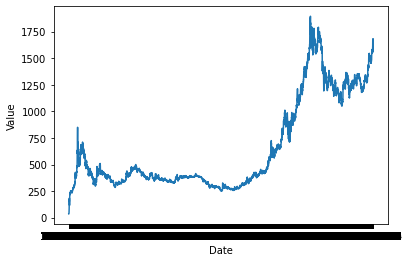

In [7]:
sns.lineplot(x='Date',y='Value',data=df)

In [6]:
from sklearn.preprocessing import MinMaxScaler
n=len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [7]:
train_df.shape

(7550, 2)

In [8]:
data_training = train_df.drop(['Date'], axis = 1)
data_training.shape

(7550, 1)

In [9]:
data_val=val_df.drop(['Date'],axis=1)

In [10]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)


In [11]:
data_training

array([[1.22714443e-04],
       [0.00000000e+00],
       [3.68143330e-04],
       ...,
       [8.88145785e-01],
       [8.85568781e-01],
       [8.92624862e-01]])

In [12]:
scaler = MinMaxScaler()
data_val = scaler.fit_transform(data_val)
data_val

array([[0.04367865],
       [0.04270613],
       [0.03276956],
       ...,
       [0.32473573],
       [0.32452431],
       [0.33327696]])

In [13]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_val = []
y_val = []

for i in range(60, data_val.shape[0]):
    X_val.append(data_val[i-60:i])
    y_val.append(data_val[i, 0])
    
X_val, y_val = np.array(X_val), np.array(y_val)

In [15]:
X_val.shape

(2098, 60, 1)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [18]:
regressor.compile(loss='mse',optimizer='adam')

In [19]:
regressor.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 22s 95ms/step - loss: 0.0088 - val_loss: 0.0040
Epoch 2/10
235/235 [==============================] - 26s 109ms/step - loss: 0.0021 - val_loss: 0.0051
Epoch 3/10
235/235 [==============================] - 25s 105ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 4/10
235/235 [==============================] - 25s 105ms/step - loss: 0.0015 - val_loss: 0.0065
Epoch 5/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 6/10
235/235 [==============================] - 26s 111ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 7/10
235/235 [==============================] - 27s 115ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 8/10
235/235 [==============================] - 27s 115ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 9/10
235/235 [==============================] - 28s 118ms/step - loss: 9.5296e-04 - val_loss: 0.0052
Epoch 10/10
235/235 [==============================] - 27s 117ms/step 

In [20]:
test_df.head()


,Date,Value
9708,2016-01-26,1113.60
9709,2016-01-27,1116.25
9710,2016-01-28,1114.00
9711,2016-01-29,1111.80
9712,2016-02-01,1126.50


In [21]:
past_60_days = train_df.tail(60)
past_60_days

,Date,Value
7490,2007-07-26,670.00
7491,2007-07-27,660.50
7492,2007-07-30,661.50
7493,2007-07-31,665.50
7494,2007-08-01,665.75
7495,2007-08-02,666.25
7496,2007-08-03,670.50
7497,2007-08-06,671.50
7498,2007-08-07,668.00
7499,2007-08-08,675.50


In [22]:
df = past_60_days.append(test_df, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

,Value
0,670.00
1,660.50
2,661.50
3,665.50
4,665.75


In [23]:
df = scaler.transform(df)
df


array([[-0.0359408 ],
       [-0.04397463],
       [-0.04312896],
       ...,
       [ 0.79598309],
       [ 0.72575053],
       [ 0.71906977]])

In [24]:
X_test = []
y_test = []

for i in range(60, df.shape[0]):
    X_test.append(df[i-60:i])
    y_test.append(df[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1079, 60, 1), (1079,))

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([[0.28050366],
       [0.2805063 ],
       [0.28051743],
       ...,
       [0.73927754],
       [0.7412151 ],
       [0.74205446]], dtype=float32)

In [27]:
scale=1/(scaler.scale_)

In [201]:
scale=1/0.00084567

In [28]:
scale

array([1182.5])

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
y_pred

array([[331.69557847],
       [331.69871494],
       [331.71185993],
       ...,
       [874.19569299],
       [876.48686737],
       [877.47940183]])

In [31]:
y_test

array([401.1 , 403.75, 401.5 , ..., 941.25, 858.2 , 850.3 ])

In [33]:
import matplotlib.pyplot as plt

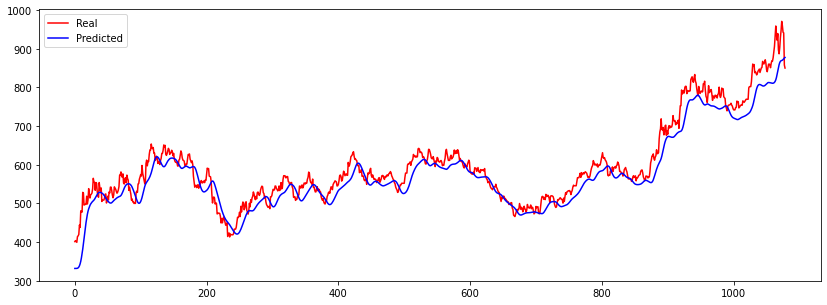

In [34]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.legend()
plt.show()